## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Student name: PAMELA AWINO OTIENO
# Student pace: Full time.¶
# Instructor name: WILLIAM OKOMBA.
# Blog post URL:

# Project Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

#  Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [207]:
# Your code here - remember to use markdown cells for comments as well!
# NumPy for numerical analysis
import numpy as np

# Pandas for data analysis
import pandas as pd

# Matplotlib.pyplot, Seaborn, and Plotly.express for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sqlite3 for database management
import sqlite3


   # 1.TN MOVIE BUDGET DATASET

# DATA UNDERSTANDING 

In [208]:
# Loading the data
tn_movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')

#Previewing the data
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [209]:
#Previewing the data

tn_movie_budgets_df.tail(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [210]:
#finding the shape of the data set
print(f"This dataset has {tn_movie_budgets_df.shape[0]}rows and {tn_movie_budgets_df.shape[1]} columns")

This dataset has 5782rows and 6 columns


In [211]:
#finding data summary
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This dataset contains float, interger and object as data types

In [260]:
#finding summary statistics
tn_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


The given table represents statistical information about a dataset with four columns: id, production_budget, domestic_gross, and worldwide_gross.

The first row of the table shows the count of rows in the dataset, which is 5782. The count of a column represents the number of non-null values present in that column.

The mean is the average value of a column. In this dataset, the mean production_budget is 3.158776e+07 (which is 31,587,760), the mean domestic_gross is 4.187333e+07 (which is 41,873,330), and the mean worldwide_gross is 9.148746e+07 (which is 91,487,460).

The standard deviation (std) measures the variability or spread of a column. In this dataset, the std of the production_budget is 4.181208e+07, the std of the domestic_gross is 6.824060e+07, and the std of the worldwide_gross is 1.747200e+08.

The minimum (min) value of the id column is 1, and the maximum (max) value is 100. The minimum production_budget in the dataset is 1,100, and the maximum is 4.25e+08 (which is 425,000,000). The minimum domestic_gross is 0, and the maximum is 9.366622e+08 (which is 936,662,200). The minimum worldwide_gross is also 0, and the maximum is 2.776345e+09 (which is 2,776,345,000).

The 25%, 50%, and 75% values represent the quartiles of the dataset. The 25% value of the production_budget column is 5.000000e+06 (which is 5,000,000), meaning 25% of the movies in the dataset have a production_budget less than or equal to 5 million dollars. Similarly, the 50% value (also called the median) of the domestic_gross column is 1.722594e+07 (which is 17,225,940), meaning that 50% of the movies in the dataset have a domestic_gross less than or equal to 17 million dollars. The 75% value of the worldwide_gross column is 9.764584e+07 (which is 97,645,840), meaning that 75% of the movies in the dataset have a worldwide_gross less than or equal to 97 million dollars.

# DATA CLEANING

In [213]:
#finding missing values
tn_movie_budgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

This dataset is complete because there are no missing values.

In [214]:
#finding data dublicates
print(tn_movie_budgets_df.duplicated().value_counts())

False    5782
dtype: int64


There are no duplicate rows in the dataset.
The number 5782 represents the count of rows in the dataset. This means that there are 5782 unique rows in the dataset, and none of them are duplicates of each other.

In [215]:
#cheking any special placeholder values since there is no missing data
tn_movie_budgets_df['release_date'].unique()

array(['Dec 18, 2009', 'May 20, 2011', 'Jun 7, 2019', ..., 'Aug 14, 2008',
       'Feb 26, 1993', 'Jul 13, 2005'], dtype=object)

In [216]:
tn_movie_budgets_df['movie'].unique()

array(['Avatar', 'Pirates of the Caribbean: On Stranger Tides',
       'Dark Phoenix', ..., 'Return to the Land of Wonders',
       'A Plague So Pleasant', 'My Date With Drew'], dtype=object)

In [217]:
# Converting production_budget, domestic_gross and worldwide_gross from objects to floats (we can convert to integers 
#but we are not sure if some values are not floats)
# Convert the column to float
# Removing dollar signs and commas from Salary column

tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


# Verify that the column is now a float data type
print(tn_movie_budgets_df.dtypes)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


The 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are all of data type 'float64', which means they are columns of floating-point values. These columns likely represent the budget and revenue figures for each movie, which can be used for financial analysis.

In [218]:
#confirming previewed data with only float values
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


# DATA ANALYSIS AND VISUALIZATION

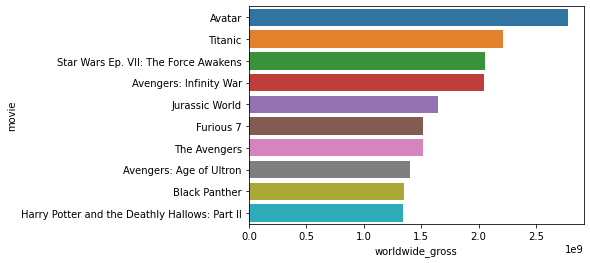

In [219]:
# Extract the top 10 movies with the highest worldwide gross
#Using horizontal bar graph to display the top 10 movies with the highest worldwide gross,movies on the Y-axis and gross on the X-axis
top_10 = tn_movie_budgets_df.nlargest(10, 'worldwide_gross')
top_10_domestic = tn_movie_budgets_df.nlargest(10, 'domestic_gross')
top_10_production = tn_movie_budgets_df.nlargest(10, 'production_budget')

sns.barplot(x='worldwide_gross', y='movie', data=top_10, orient='h');

The above plot displays the top 10 movies with the highest worldwide gross revenue, with the movie titles listed on the y-axis and the corresponding revenue values displayed as horizontal bars on the x-axis. The length of each horizontal bar represents the amount of worldwide gross revenue earned by each movie. Avatar generated the highest worldwide gross revenue, followed by Titanic, Star Wars Ep. VII: The force Awakens, Avengers:Infinity War, Jurassic World, Furious 7, The Avengers, Avengers:Age of Ultron, Black Panther in that order with Harry Potter and the Deathly Hallows: Part II generating the least worldwide gross revenue.

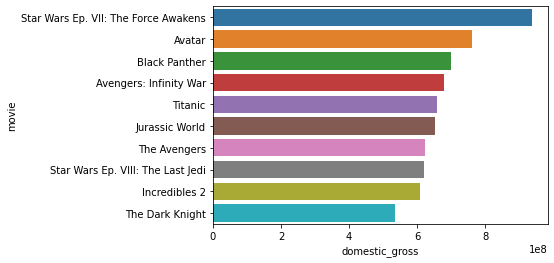

In [220]:
#plotting using seaborn of domestic gross agaisnt movies
sns.barplot(x='domestic_gross', y='movie', data=top_10_domestic, orient='h');

The above plot displays the top 10 movies with the highest domestic gross revenue, with the movie titles listed on the y-axis and the corresponding revenue values displayed as horizontal bars on the x-axis. The length of each horizontal bar represents the amount of domestic gross revenue earned by each movie.  Star Wars Ep. VII: The force Awakens generated the highest domestic gross revenue, followed by Avater, Black Panther, Avengers:Infinity War, Titanic, Jurassic World, The Avangers, Star Wars Ep. VII: The Last Jedi, Incredible in that order with The Dark Knight generating the domestic gross revenue.

In [221]:
import warnings

warnings.filterwarnings("ignore") 

# Code that generates a DeprecationWarning will be ignored.

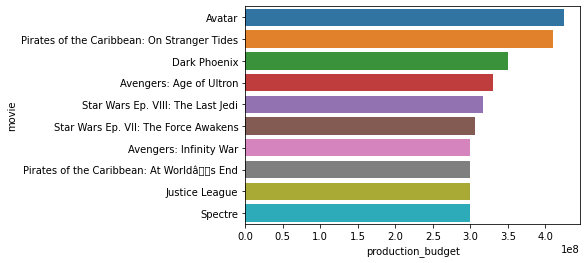

In [222]:
#plotting bargraph uing seaborn of production budget agaisnt movie
sns.barplot(x='production_budget', y='movie', data=top_10_production, orient='h');

The above plot displays the top 10 movies with the highest production budgets, with the movie titles listed on the y-axis and the corresponding production budget values displayed as horizontal bars on the x-axis. Avater incured the highest production budget followed by Pirates of the Caribbean: On Stranger Tides, Dark Pheonix, Avangers:Age of Ultron, Star Wars Ep. VII:The Last Jedi, Star Wars Ep.VII: The Force Awakens, Avangers: Infinity War, Pirates of the Caribbean: At Worlds End, Justice League in that order with Spectre icuring the lowest production value.

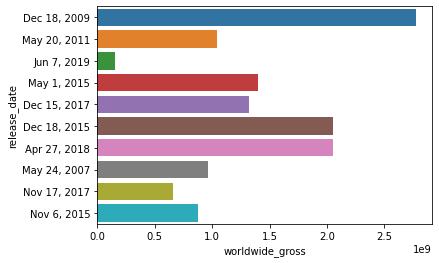

In [262]:
##plotting bargraph using seaborn of worldwide gross vs release date
sns.barplot(x='worldwide_gross', y='release_date', data=top_10_production, orient='h');

The above plot displays the release dates and corresponding worldwide gross revenue for the top 10 movies with the highest worldwide gross revenue, with the release dates listed on the y-axis and the corresponding revenue values displayed as horizontal bars on the x-axis. There is no pattern in the release date therefore release time does not affect worlwide gross revenue of the movie.

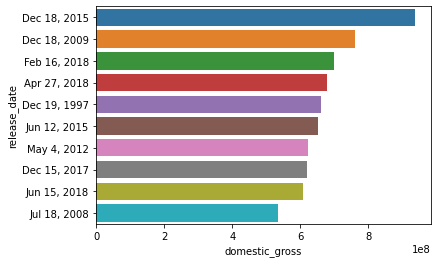

In [224]:
#plotting bargraph using seaborn of domestic gross vs release date
sns.barplot(x='domestic_gross', y='release_date', data=top_10_domestic, orient='h');

The above plot displays the release dates and corresponding domestic gross revenue for the top 10 movies with the highest domestic gross revenue, with the release dates listed on the y-axis and the corresponding revenue values displayed as horizontal bars on the x-axis. There is no pattern in the release date therefore release time does not affect domestic gross revenue of the movie.

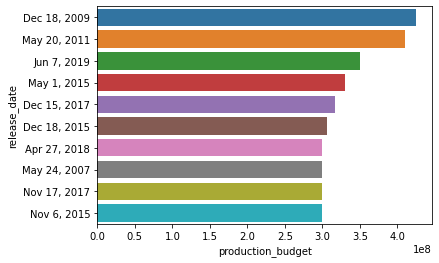

In [225]:
sns.barplot(x='production_budget', y='release_date', data=top_10_production, orient='h');

The above plot displays the release dates and corresponding production budgets for the top 10 movies with the highest production budgets, with the release dates listed on the y-axis and the corresponding budget values displayed as horizontal bars on the x-axis. The plot contains no pattern therefore release date has no direct relationship with production budget

# Data analysis using heatmap

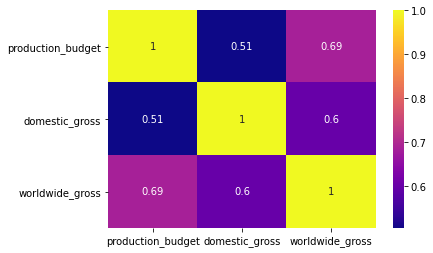

In [226]:
sns.heatmap(data=top_10[['production_budget', 'domestic_gross', 'worldwide_gross']].corr(), cmap='plasma', annot=True); 

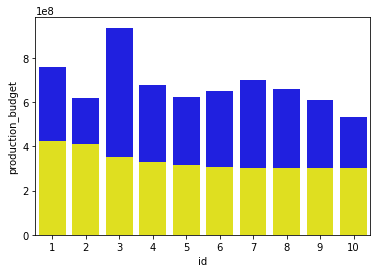

In [228]:
#Data analysis using bargraph
sns.barplot(x='id', y='domestic_gross', data=top_10_domestic, color='blue')
#sns.barplot(x='id', y='worldwide_gross', data=top_10, color='red')
sns.barplot(x='id', y='production_budget', data=top_10_production, color='yellow');

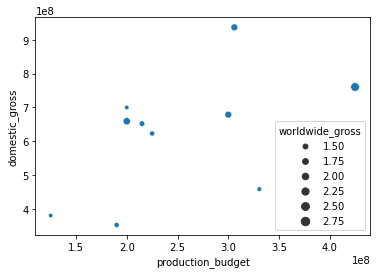

In [230]:
##Data analysis using scatter plot(production vs domestic gross)
sns.scatterplot(x='production_budget', y='domestic_gross', size='worldwide_gross', data=top_10);

# 2. BOM MOVIES DATASET


# DATA UNDERSTANDING

In [231]:
# Loading the data
bom_movies_gross_df = pd.read_csv('bom.movie_gross.csv.gz')

#Previewing the data
bom_movies_gross_df.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [232]:
bom_movies_gross_df.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [233]:
#getting data shape
bom_movies_gross_df.shape

(3387, 5)

This dataset contains 3387 rows and 5 columns

In [234]:
#describing bom_movies_gross
bom_movies_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


This dataset contains float, integer and objects as data types.

In [264]:
bom_movies_gross_df.describe()

,domestic_gross,year
count,3.387000e+03,3387.000000
mean,2.851978e+07,2013.958075
std,6.675093e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.225000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.750000e+07,2016.000000
max,9.367000e+08,2018.000000


This summary provides basic information about the distribution of 'domestic_gross' and 'year' in the dataset

# DATA CLEANING

In [235]:
#Data inspection and exploration
#finding missing data
bom_movies_gross_df.isnull()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


This dataset contains missing values therefore incomplete

In [236]:
#finding total missing values
bom_movies_gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In the studio row, there are 5 missing values, 28 in the domestic gross and 1350 in the foreign gross

In [238]:
#filling missing values
bom_movies_gross_df['domestic_gross'].fillna(bom_movies_gross_df['domestic_gross'].median(), inplace = True)

In [239]:
bom_movies_gross_df.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [240]:
bom_movies_gross_df['studio'].fillna('Missing', inplace = True)

In [241]:
bom_movies_gross_df.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [242]:
#dropping foreign gross row
bom_movies_gross_df.drop('foreign_gross', axis=1, inplace=True)

In [243]:
bom_movies_gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [244]:
#confirming if data is clean now
bom_movies_gross_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


This dataset is now complete for analysis

In [245]:
#detecting any placeholder in the remaining data
bom_movies_gross_df['title'].unique()

array(['Toy Story 3', 'Alice in Wonderland (2010)',
       'Harry Potter and the Deathly Hallows Part 1', ..., 'El Pacto',
       'The Swan', 'An Actor Prepares'], dtype=object)

In [246]:
bom_movies_gross_df['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', 'Missing', 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand',
       'NGE', 'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK',
       'FInd.', 'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS',
       'Mont.', 'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM',
       'Vita.', 'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF',
       'IM', 'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC'

In [247]:
bom_movies_gross_df['domestic_gross'].unique()

array([4.150e+08, 3.342e+08, 2.960e+08, ..., 2.070e+04, 1.290e+04,
       2.400e+03])

In [248]:
bom_movies_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

# BOM DATA ANALYSIS AND VISUALIZATION

In [249]:
bom_movies_gross_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [250]:
studio_gross_title = bom_movies_gross_df.groupby("title")["domestic_gross"].sum().reset_index()
print(studio_gross_title)

                               title  domestic_gross
0                                '71       1300000.0
1             1,000 Times Good Night         53900.0
2                10 Cloverfield Lane      72100000.0
3                           10 Years        203000.0
4                         1001 Grams         11000.0
...                              ...             ...
3381                     Zoolander 2      28800000.0
3382                        Zootopia     341300000.0
3383                         [Rec] 2         27800.0
3384                         mother!      17800000.0
3385  xXx: The Return of Xander Cage      44900000.0

[3386 rows x 2 columns]


In [251]:
studio_gross = bom_movies_gross_df.groupby("studio")["domestic_gross"].sum().reset_index()
print(studio_gross)

    studio  domestic_gross
0       3D       6100000.0
1      A23        164200.0
2      A24     324194200.0
3      ADC        248200.0
4       AF       2142900.0
..     ...             ...
253     XL        458000.0
254    YFG       1100000.0
255   Yash      33031400.0
256    Zee       1100000.0
257  Zeit.       5663500.0

[258 rows x 2 columns]


In [252]:
studio_gross = bom_movies_gross_df.groupby("studio")["domestic_gross"].sum().reset_index()
print(studio_gross)

    studio  domestic_gross
0       3D       6100000.0
1      A23        164200.0
2      A24     324194200.0
3      ADC        248200.0
4       AF       2142900.0
..     ...             ...
253     XL        458000.0
254    YFG       1100000.0
255   Yash      33031400.0
256    Zee       1100000.0
257  Zeit.       5663500.0

[258 rows x 2 columns]


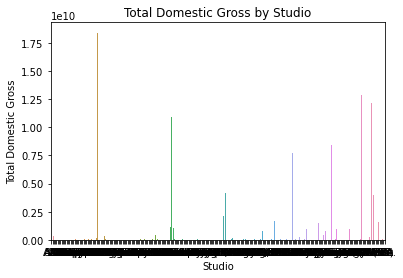

In [253]:
#plotting bar graph
sns.barplot(x="studio", y="domestic_gross", data=studio_gross)
plt.xlabel("Studio")
plt.ylabel("Total Domestic Gross")
plt.title("Total Domestic Gross by Studio")
plt.show()

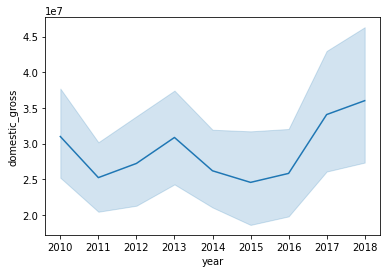

In [254]:
#linegraph
sns.lineplot(x='year', y='domestic_gross', data=bom_movies_gross_df)
plt.show()


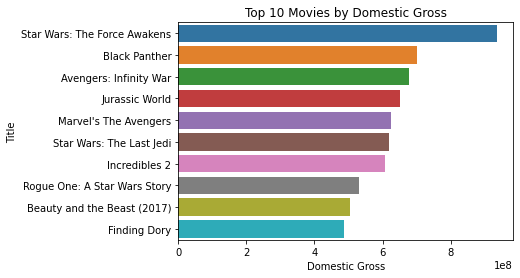

In [255]:
# Sort the dataset by domestic gross in descending order
sorted_data = bom_movies_gross_df.sort_values('domestic_gross', ascending=False)

# Selecting the top 10 movies by domestic gross
top_10 = sorted_data.head(10)

# Create the bar chart
sns.barplot(x="domestic_gross", y="title", data = top_10)
plt.xlabel("Domestic Gross")
plt.ylabel("Title")
plt.title("Top 10 Movies by Domestic Gross")
plt.show()

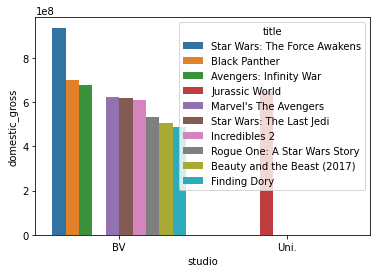

In [256]:
#plotting stacked bar chart
sns.barplot(x='studio', y='domestic_gross', hue='title', data=top_10, ci=None)
plt.show()

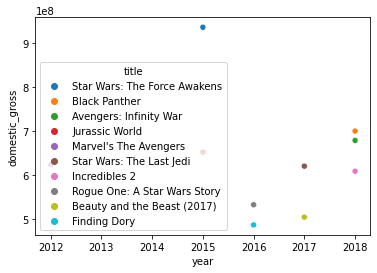

In [257]:
#plotting scatter plot
sns.scatterplot(x='year', y='domestic_gross', hue='title', data=top_10)
plt.show()

### IM.DB DATASET

# DATA UNDERSTANDING

In [259]:
# Creating a connection to the database
import sqlite3
conn = sqlite3.connect('im.db')
pd.read_sql("""SELECT * FROM persons;""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


This dataset contains 606648 rows and 5 columns